In [1]:
import numpy as np 
import  numpy as np
import seaborn as sns
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
import sys
from spinner_corr import spinner_correlation
from tqdm import tqdm

# Słaby sygnał

In [434]:
p = 60
n = 100
B1 = 1 * np.ones((15, 15))
B2 = -1 * np.ones((12, 12))
B3 = 1 * np.ones((10, 10))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 18  #
BB = block_diag(np.zeros((5, 5)), B1, np.zeros((6, 6)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 12)
np.all(np.linalg.eigvals(BB) > 0)

True

<AxesSubplot:>

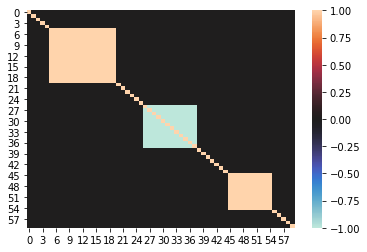

In [3]:
sns.heatmap(BB, center=0, vmin=-1, vmax=1)

In [435]:
X = np.zeros((n, p))
mean = np.zeros(p)
cov = BB
np.random.seed(2020)
for row in range(X.shape[0]):
    X[row, :] = np.random.multivariate_normal(mean, cov, 1)
Z = np.identity(p)
X = (X - np.mean(X, axis=0))
Y_checked = (X.T @X)/X.shape[0]
print(f"Error dla czystej macierzy covariancji wynosi {((Y_checked - BB)**2).sum()}")

Error dla czystej macierzy covariancji wynosi 5277.065725956824


<AxesSubplot:>

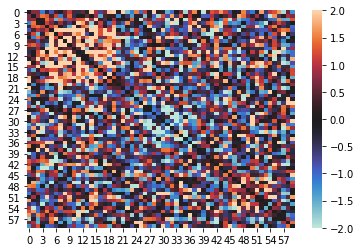

In [125]:
put_to_diagonal = np.diagonal(Y_checked).copy()
np.fill_diagonal(Y_checked,0)
sns.heatmap(Y_checked , center=0, vmin=-2, vmax=2)

<AxesSubplot:>

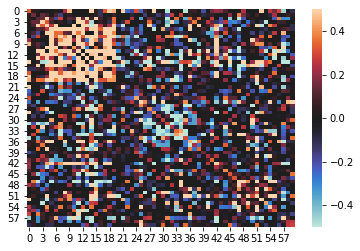

In [126]:
out = spinner_correlation(Y_checked, Z, 5, 0.7)
sns.heatmap(out["B"], center=0, vmin=-0.5, vmax=0.5)

In [127]:
B_estim = out["B"]
np.fill_diagonal(B_estim,put_to_diagonal)
print(f"Error dla estymacji covariancji wynosi {((B_estim - BB)**2).sum()}")

Error dla estymacji covariancji wynosi 664.2539515736471


error z szumem losowym 3480.2867353773017


<AxesSubplot:>

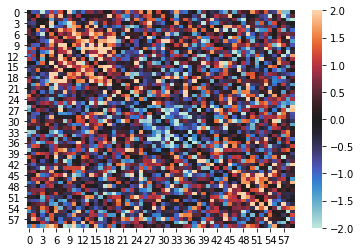

In [436]:
Y_magic = BB + np.random.randn(p, p)
put_to_diagonal = np.diagonal(Y_magic).copy()
print(f"error z szumem losowym {((Y_magic - BB)**2).sum()}")
np.fill_diagonal(Y_magic, 0)
sns.heatmap(Y_magic, center=0, vmin=-2, vmax=2)

<AxesSubplot:>

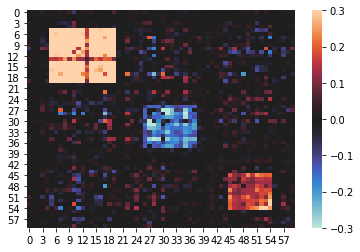

In [448]:
out = spinner_correlation(Y_magic, Z, 5, 0.4)# (5,0.4)
sns.heatmap(out["B"], center=0, vmin=-0.3, vmax=0.3)

In [59]:
B_estim_magic = out["B"]
np.fill_diagonal(B_estim_magic,put_to_diagonal)
print(f"Error dla estymacji covariancji wynosi {((B_estim_magic - BB)**2).sum()}")

Error dla estymacji covariancji wynosi 411.83700910377604


# Mocny sygnał

In [130]:
p = 60
n = 100
B1 = 20 * np.ones((15, 15))
B2 = -20 * np.ones((12, 12))
B3 = 20 * np.ones((10, 10))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 18  #
BB = block_diag(np.zeros((5, 5)), B1, np.zeros((6, 6)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 250)
np.all(np.linalg.eigvals(BB) > 0)

True

<AxesSubplot:>

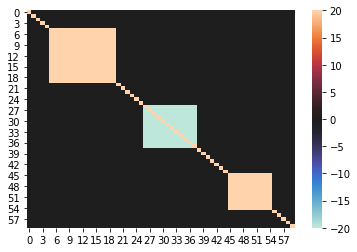

In [68]:
sns.heatmap(BB, center=0, vmin=-20, vmax=20)

In [131]:
X = np.zeros((n, p))
mean = np.zeros(p)
cov = BB
np.random.seed(2020)
for row in range(X.shape[0]):
    X[row, :] = np.random.multivariate_normal(mean, cov, 1)
Z = np.identity(p)
X = (X - np.mean(X, axis=0))
Y_checked = (X.T @X)/X.shape[0]
print(f"Error dla czystej macierzy covariancji wynosi {((Y_checked - BB)**2).sum()}")

Error dla czystej macierzy covariancji wynosi 2288128.944922502


<AxesSubplot:>

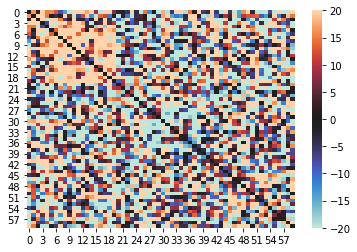

In [132]:
put_to_diagonal = np.diagonal(Y_checked).copy()
np.fill_diagonal(Y_checked,0)
sns.heatmap(Y_checked , center=0, vmin=-20, vmax=20)

<AxesSubplot:>

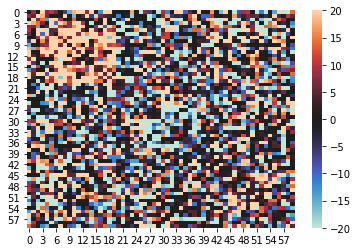

In [133]:
out = spinner_correlation(Y_checked, Z, 20, 7)
sns.heatmap(out["B"], center=0, vmin=-20, vmax=20)

In [134]:
B_estim = out["B"]
np.fill_diagonal(B_estim,put_to_diagonal)
print(f"Error dla estymacji covariancji wynosi {((B_estim - BB)**2).sum()}")

Error dla estymacji covariancji wynosi 1221670.6558806836


error z szumem losowym 3480.2867353773017


<AxesSubplot:>

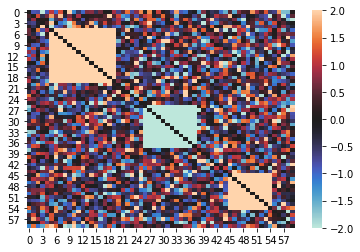

In [135]:
Y_magic = BB + np.random.randn(p, p)
put_to_diagonal = np.diagonal(Y_magic).copy()
print(f"error z szumem losowym {((Y_magic - BB)**2).sum()}")
np.fill_diagonal(Y_magic, 0)
sns.heatmap(Y_magic, center=0, vmin=-2, vmax=2)

<AxesSubplot:>

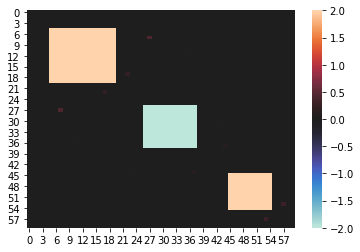

In [136]:
out = spinner_correlation(Y_magic, Z, 5, 2)
sns.heatmap(out["B"], center=0, vmin=-2, vmax=2)

In [137]:
B_estim_magic = out["B"]
np.fill_diagonal(B_estim_magic,put_to_diagonal)
print(f"Error dla estymacji covariancji wynosi {((B_estim_magic - BB)**2).sum()}")

Error dla estymacji covariancji wynosi 3374.643401303106


# Duże macierze

In [406]:
p = 60
n = 600 # jak było 1000 to było super 500 też
B1 = 1 * np.ones((15, 15))
B2 = -1 * np.ones((12, 12))
B3 = 1 * np.ones((10, 10))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 18  #
BB = block_diag(np.zeros((5, 5)), B1, np.zeros((6, 6)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 12)
np.all(np.linalg.eigvals(BB) > 0)

True

<AxesSubplot:>

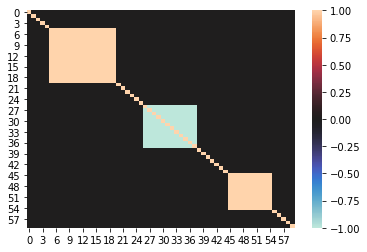

In [179]:
sns.heatmap(BB, center=0, vmin=-1, vmax=1)

In [407]:
X = np.zeros((n, p))
mean = np.zeros(p)
cov = BB
np.random.seed(2020)
for row in range(X.shape[0]):
    X[row, :] = np.random.multivariate_normal(mean, cov, 1)
Z = np.identity(p)
X = (X - np.mean(X, axis=0))
Y_checked = (X.T @X)/X.shape[0]
print(f"Error dla czystej macierzy covariancji wynosi {((Y_checked - BB)**2).sum()}")

Error dla czystej macierzy covariancji wynosi 839.8581028822955


<AxesSubplot:>

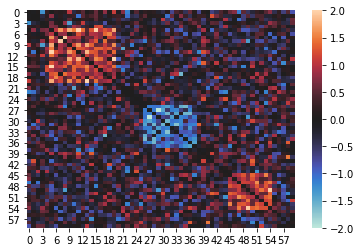

In [408]:
put_to_diagonal = np.diagonal(Y_checked).copy()
np.fill_diagonal(Y_checked,0)
sns.heatmap(Y_checked , center=0, vmin=-2, vmax=2)

<AxesSubplot:>

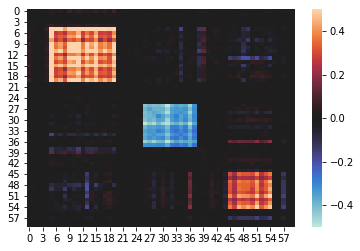

In [409]:
out = spinner_correlation(Y_checked, Z,4, 0.25) # (2.5,0.5,500)(5, 0.15,400) (4, 0.25, 1000 lub 600)
sns.heatmap(out["B"], center=0, vmin=-0.5, vmax=0.5)

In [228]:
B_estim = out["B"]
np.fill_diagonal(B_estim,put_to_diagonal)
print(f"Error dla estymacji covariancji wynosi {((B_estim - BB)**2).sum()}")

Error dla estymacji covariancji wynosi 308.3430187312342


# Duze i duże wartości


In [392]:
p = 60
n = 600
B1 = 20 * np.ones((15, 15))
B2 = -20 * np.ones((12, 12))
B3 = 20 * np.ones((10, 10))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 18  #
BB = block_diag(np.zeros((5, 5)), B1, np.zeros((6, 6)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 270)
np.all(np.linalg.eigvals(BB) > 0)

True

In [393]:
X = np.zeros((n, p))
mean = np.zeros(p)
cov = BB
np.random.seed(2020)
for row in range(X.shape[0]):
    X[row, :] = np.random.multivariate_normal(mean, cov, 1)
Z = np.identity(p)
X = (X - np.mean(X, axis=0))
Y_checked = (X.T @X)/X.shape[0]
print(f"Error dla czystej macierzy covariancji wynosi {((Y_checked - BB)**2).sum()}")

Error dla czystej macierzy covariancji wynosi 425737.9067023983


<AxesSubplot:>

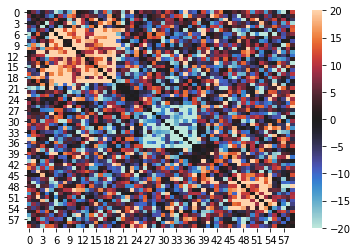

In [394]:
put_to_diagonal = np.diagonal(Y_checked).copy()
np.fill_diagonal(Y_checked,0)
sns.heatmap(Y_checked , center=0, vmin=-20, vmax=20)

<AxesSubplot:>

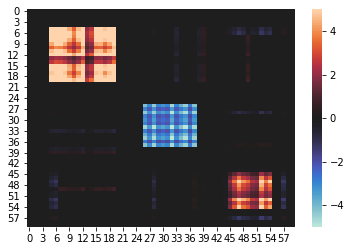

In [395]:
out = spinner_correlation(Y_checked, Z,100, 8) # (100,8,400) (100,8,600)
sns.heatmap(out["B"], center=0, vmin=-5, vmax=5)

In [396]:
B_estim = out["B"]
np.fill_diagonal(B_estim,put_to_diagonal)
print(f"Error dla estymacji covariancji wynosi {((B_estim - BB)**2).sum()}")

Error dla estymacji covariancji wynosi 126425.93565544272



# Czy bloczki mają znaczenie ? (wychodzą słabiej niż normalnie te duże)

In [673]:
p = 60
n = 1000
B1 = 1 * np.ones((15, 15))
B2 = -1 * np.ones((15, 15))
B3 = 1 * np.ones((15, 15))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 15  #
BB = block_diag(np.zeros((5, 5)), B1, np.zeros((5, 5)), B2, np.zeros((5, 5)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 20)
np.all(np.linalg.eigvals(BB) > 0)

True

In [419]:
p = 60
n = 600 # jak było 1000 to było super 500 też
B1 = 1 * np.ones((15, 15))
B2 = -1 * np.ones((12, 12))
B3 = 1 * np.ones((10, 10))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 18  #
BB = block_diag(np.zeros((5, 5)), B1, np.zeros((6, 6)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 12)
np.all(np.linalg.eigvals(BB) > 0)

True

In [674]:
X = np.zeros((n, p))
mean = np.zeros(p)
cov = BB
np.random.seed(2020)
for row in range(X.shape[0]):
    X[row, :] = np.random.multivariate_normal(mean, cov, 1)
Z = np.identity(p)
X = (X - np.mean(X, axis=0))
Y_checked = (X.T @X)/X.shape[0]
print(f"Error dla czystej macierzy covariancji wynosi {((Y_checked - BB)**2).sum()}")

Error dla czystej macierzy covariancji wynosi 149.99427145797833


<AxesSubplot:>

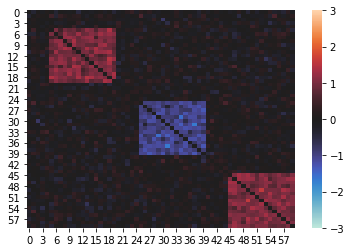

In [675]:
put_to_diagonal = np.diagonal(Y_checked).copy()
np.fill_diagonal(Y_checked,0)
sns.heatmap(Y_checked , center=0, vmin=-3, vmax=3)

<AxesSubplot:>

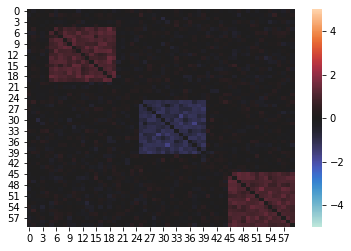

In [676]:
out = spinner_correlation(Y_checked, Z,0.01, 0.01) # (100,8,400) (100,8,600)
sns.heatmap(out["B"], center=0, vmin=-5, vmax=5)

# Pomniejsze eksperymenty 



In [558]:
p = 60
n = 500 # jak było 1000 to było super 500 też dla 400 jeszcze nic nie widzimy 
B1 = 1 * np.ones((15, 15))
B2 = -1 * np.ones((12, 12))
B3 = 1 * np.ones((10, 10))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 18  #
BB = block_diag(np.zeros((5, 5)), B1, np.zeros((6, 6)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 12)
np.all(np.linalg.eigvals(BB) > 0)

True

In [559]:
X = np.zeros((n, p))
mean = np.zeros(p)
cov = BB
np.random.seed(2020)
for row in range(X.shape[0]):
    X[row, :] = np.random.multivariate_normal(mean, cov, 1)
Z = np.identity(p)
X = (X - np.mean(X, axis=0))
Y_checked = (X.T @X)/X.shape[0]
print(f"Error dla czystej macierzy covariancji wynosi {((Y_checked - BB)**2).sum()}")

Error dla czystej macierzy covariancji wynosi 1017.1106793017273


<AxesSubplot:>

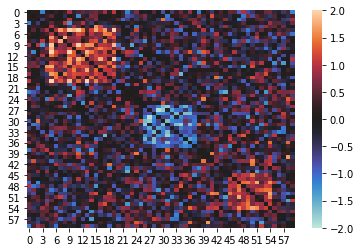

In [560]:
put_to_diagonal = np.diagonal(Y_checked).copy()
np.fill_diagonal(Y_checked,0)
sns.heatmap(Y_checked , center=0, vmin=-2, vmax=2)

<AxesSubplot:>

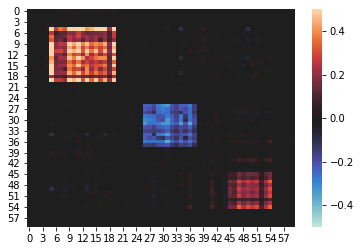

In [561]:
out = spinner_correlation(Y_checked, Z,3, 0.5) # (3,0.5,500)(5, 0.15,400) (4, 0.25, 1000 lub 600)
sns.heatmap(out["B"], center=0, vmin=-0.5, vmax=0.5)

In [514]:
B_estim = out["B"]
np.fill_diagonal(B_estim,put_to_diagonal)
print(f"Error dla estymacji covariancji wynosi {((B_estim - BB)**2).sum()}")

Error dla estymacji covariancji wynosi 346.2482429127059


# Inne rozmiary 

In [661]:
p = 100
n = 1000 # 
B1 = 1 * np.ones((25, 25))
B2 = -1 * np.ones((20, 20))
B3 = 1 * np.ones((15, 15))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 23  #
BB = block_diag(np.zeros((10, 10)), B1, np.zeros((6, 6)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 20)
np.all(np.linalg.eigvals(BB) > 0)

True

<AxesSubplot:>

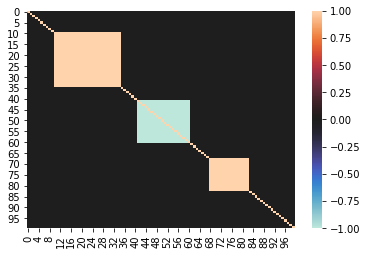

In [587]:
sns.heatmap(BB, center=0, vmin=-1, vmax=1)

In [662]:
X = np.zeros((n, p))
mean = np.zeros(p)
cov = BB
np.random.seed(2020)
for row in range(X.shape[0]):
    X[row, :] = np.random.multivariate_normal(mean, cov, 1)
Z = np.identity(p)
X = (X - np.mean(X, axis=0))
Y_checked = (X.T @X)/X.shape[0]
print(f"Error dla czystej macierzy covariancji wynosi {((Y_checked - BB)**2).sum()}")

Error dla czystej macierzy covariancji wynosi 3973.004723946405


<AxesSubplot:>

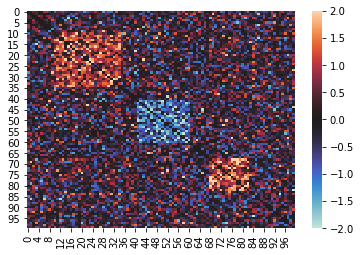

In [663]:
put_to_diagonal = np.diagonal(Y_checked).copy()
np.fill_diagonal(Y_checked,0)
sns.heatmap(Y_checked , center=0, vmin=-2, vmax=2)

<AxesSubplot:>

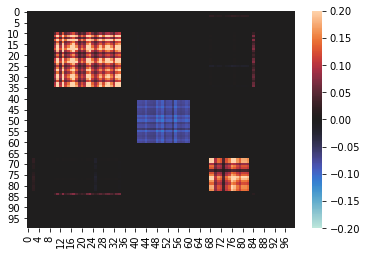

In [664]:
out = spinner_correlation(Y_checked, Z,8, 0.5) # (500, 10, 0.4) <--800--> (700, 8, 0.5)
sns.heatmap(out["B"], center=0, vmin=-0.2, vmax=0.2)

In [665]:
B_estim = out["B"]
np.fill_diagonal(B_estim,put_to_diagonal)
print(f"Error dla estymacji covariancji wynosi {((B_estim - BB)**2).sum()}")

Error dla estymacji covariancji wynosi 1026.7242087821935
